In [149]:
!pip install ucimlrepo


### import required packages

In [192]:
from ucimlrepo import fetch_ucirepo 
import numpy as np
import pandas as pd
import requests
import zipfile
from io import BytesIO
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

#### Data Exploration

In [171]:

# fetch dataset 
obesity = fetch_ucirepo(id=544) 
  
# data (as pandas dataframes) 
X = obesity.data.features 
y = obesity.data.targets 
  
# metadata 
print(obesity.metadata) 
  
# variable information 
print(obesity.variables) 

# variable shape
print(X.shape) 



{'uci_id': 544, 'name': 'Estimation of Obesity Levels Based On Eating Habits and Physical Condition ', 'repository_url': 'https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition', 'data_url': 'https://archive.ics.uci.edu/static/public/544/data.csv', 'abstract': 'This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 2111, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': ['Gender', 'Age'], 'target_col': ['NObeyesdad'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C5H31Z', 'creators': [], 'intro_paper': {'title': 'Dataset f

(2111, 16)
   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS  
0  Public_Transportation  
1  Public_Transportation  
2  Public_Transportation  
3                Walking  
4  Public_Transportation  
[[<

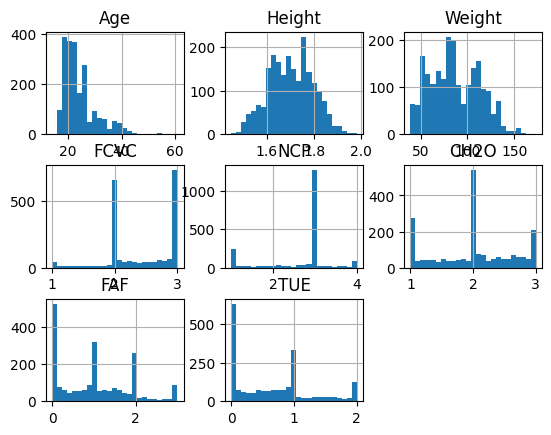

In [152]:
# exploratory  data analysis of features
print(X.shape) 

print(X.head(5))

print(X.hist(bins=25))






In [153]:
# function for checking percentages of target variable
def counts_as_percentage(series):
    return series.value_counts() / series.shape[0]

In [154]:
# exploratory  data analysis of target

print(y.head())

# function for checking percentage of  
counts_as_percentage(y)
counts_as_percentage(X)

            NObeyesdad
0        Normal_Weight
1        Normal_Weight
2        Normal_Weight
3   Overweight_Level_I
4  Overweight_Level_II


Gender  Age        Height    Weight      family_history_with_overweight  FAVC  FCVC      NCP       CAEC        SMOKE  CH2O      SCC  FAF       TUE       CALC        MTRANS               
Male    21.000000  1.620000  70.000000   no                              yes   2.000000  1.000000  no          no     3.000000  no   1.000000  0.000000  Sometimes   Public_Transportation    0.007106
Female  21.000000  1.520000  42.000000   no                              yes   3.000000  1.000000  Frequently  no     1.000000  no   0.000000  0.000000  Sometimes   Public_Transportation    0.001895
        22.000000  1.690000  65.000000   yes                             yes   2.000000  3.000000  Sometimes   no     2.000000  no   1.000000  1.000000  Sometimes   Public_Transportation    0.000947
Male    18.000000  1.720000  53.000000   yes                             yes   2.000000  3.000000  Sometimes   no     2.000000  no   0.000000  2.000000  Sometimes   Public_Transportation    0.000947
Female  16.000000

#### Data preparation

In [155]:
# Make all column names lowercase
X.rename(columns={column: column.lower() for column in X.columns}, inplace=True)
y.rename(columns={column: column.lower() for column in y.columns}, inplace=True)


C:\Users\Majeed Win10\AppData\Local\Temp\ipykernel_15688\3873541000.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.rename(columns={column: column.lower() for column in X.columns}, inplace=True)
C:\Users\Majeed Win10\AppData\Local\Temp\ipykernel_15688\3873541000.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.rename(columns={column: column.lower() for column in y.columns}, inplace=True)


In [156]:
print(X)
print(y)


      gender        age    height      weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     favc  fcvc  ncp       caec smoke  

In [157]:
# rename family history columns to make it short
X = X.rename(columns={'family_history_with_overweight': 'fam_his'})
# variables
print(X.columns) 


Index(['gender', 'age', 'height', 'weight', 'fam_his', 'favc', 'fcvc', 'ncp',
       'caec', 'smoke', 'ch2o', 'scc', 'faf', 'tue', 'calc', 'mtrans'],
      dtype='object')


In [158]:
# Create dummies

X1 = pd.get_dummies(
    X, 
    columns=[ "caec", "calc", "mtrans"], 
    drop_first=False)
X1 = pd.get_dummies(
    X1, 
    columns=["gender","fam_his", "favc", "smoke", "scc"], 
    drop_first=True)

# Make all column names lowercase
X1.rename(columns={column: column.lower() for column in X1.columns}, inplace=True)

print(X1.columns)
print(X1[['caec_always', 'caec_frequently', 'caec_sometimes', 'caec_no',
       'calc_always', 'calc_frequently', 'calc_sometimes', 'calc_no',
       'mtrans_automobile', 'mtrans_bike', 'mtrans_motorbike',
       'mtrans_public_transportation', 'mtrans_walking', 'gender_male',
       'fam_his_yes', 'favc_yes', 'smoke_yes', 'scc_yes']])


Index(['age', 'height', 'weight', 'fcvc', 'ncp', 'ch2o', 'faf', 'tue',
       'caec_always', 'caec_frequently', 'caec_sometimes', 'caec_no',
       'calc_always', 'calc_frequently', 'calc_sometimes', 'calc_no',
       'mtrans_automobile', 'mtrans_bike', 'mtrans_motorbike',
       'mtrans_public_transportation', 'mtrans_walking', 'gender_male',
       'fam_his_yes', 'favc_yes', 'smoke_yes', 'scc_yes'],
      dtype='object')
      caec_always  caec_frequently  caec_sometimes  caec_no  calc_always  \
0           False            False            True    False        False   
1           False            False            True    False        False   
2           False            False            True    False        False   
3           False            False            True    False        False   
4           False            False            True    False        False   
...           ...              ...             ...      ...          ...   
2106        False            False       

In [159]:
# Unique values in 'Category' column
unique_categories = X1[['caec_always', 'caec_frequently', 'caec_sometimes', 'caec_no',
       'calc_always', 'calc_frequently', 'calc_sometimes', 'calc_no',
       'mtrans_automobile', 'mtrans_bike', 'mtrans_motorbike',
       'mtrans_public_transportation', 'mtrans_walking', 'gender_male',
       'fam_his_yes', 'favc_yes', 'smoke_yes', 'scc_yes']]
print(unique_categories.head)

<bound method NDFrame.head of       caec_always  caec_frequently  caec_sometimes  caec_no  calc_always  \
0           False            False            True    False        False   
1           False            False            True    False        False   
2           False            False            True    False        False   
3           False            False            True    False        False   
4           False            False            True    False        False   
...           ...              ...             ...      ...          ...   
2106        False            False            True    False        False   
2107        False            False            True    False        False   
2108        False            False            True    False        False   
2109        False            False            True    False        False   
2110        False            False            True    False        False   

      calc_frequently  calc_sometimes  calc_no  mtrans_au

#### Split train and test data

In [181]:

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit the encoder and transform the target
y_encoded = label_encoder.fit_transform(y)

# Change y to 1D
y1=y['NObeyesdad']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.33, random_state=42, stratify=y)

# Create dataframes
X_train_df = pd.DataFrame(X_train, columns=X1.columns)
X_test_df = pd.DataFrame(X_test, columns=X1.columns)

print(X_train_df.columns)
print("Shape of features training data: ")
print(np.shape(X_train))
print("Shape of target training data: ")
print(np.shape(y_train))
print("Shape of features test data: ")
print(np.shape(X_test))
print("Shape of taget test data: ")
print(np.shape(y_test))


Index(['age', 'height', 'weight', 'fcvc', 'ncp', 'ch2o', 'faf', 'tue',
       'caec_always', 'caec_frequently', 'caec_sometimes', 'caec_no',
       'calc_always', 'calc_frequently', 'calc_sometimes', 'calc_no',
       'mtrans_automobile', 'mtrans_bike', 'mtrans_motorbike',
       'mtrans_public_transportation', 'mtrans_walking', 'gender_male',
       'fam_his_yes', 'favc_yes', 'smoke_yes', 'scc_yes'],
      dtype='object')
Shape of features training data: 
(1414, 26)
Shape of target training data: 
(1414,)
Shape of features test data: 
(697, 26)
Shape of taget test data: 
(697,)


c:\Users\Majeed Win10\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##### check for outliers


In [182]:
# Define function
def identify_outliers(df):
   
    # Calculate mean and standard deviation
    mean = df.mean()
    std_dev = df.std()
    
    # Define boundaries for outliers
    upper_bound = mean + 3 * std_dev
    lower_bound = mean - 3 * std_dev
    
    # Create a boolean mask for outliers
    outliers_mask = (df > upper_bound) | (df < lower_bound)
    
    return outliers_mask


In [162]:
outliers_df= identify_outliers(X_train_df)


print(outliers_df.sum().sum())
print(outliers_df.sum().sum()/X_train_df.sum().sum())

268
0.001494626705735212
0.001494626705735212


In [183]:
# outlierFill function
def fill_outliers(df):
   
    # Calculate mean and standard deviation
    mean = df.mean()
    std_dev = df.std()
    
    # Define boundaries for outliers
    upper_bound = mean + 3 * std_dev
    lower_bound = mean - 3 * std_dev
    
    # Create a boolean mask for outliers
    df_filled = df.clip(lower=lower_bound, upper=upper_bound, axis=1)
    
    return df_filled

X_train_df1 = fill_outliers(X_train_df)
X_test_df1 = fill_outliers(X_test_df)

### Scale the data

In [184]:
# Create a function for scaling the dataframe

def scale_dataset1(data):

  scaler = MinMaxScaler(feature_range=(-1, 1))
  X_scaled = scaler.fit_transform(data)


  return X_scaled


In [185]:
# Scale the data

X_train_scaled1 = scale_dataset1(X_train_df1)
X_test_scaled1 = scale_dataset1(X_test_df1)
print(X_train_scaled1)

[[-0.75932784  0.08723699  0.53863413 ...  1.         -1.
  -1.        ]
 [-0.63120284 -0.83327159 -0.94574127 ... -1.         -1.
  -1.        ]
 [-0.26240568 -0.32361445  0.19733925 ...  1.         -1.
  -1.        ]
 ...
 [-0.70645148  0.13439027 -0.73697053 ...  1.         -1.
  -1.        ]
 [ 0.01990714  0.69288118  0.40200046 ...  1.         -1.
  -1.        ]
 [-0.40992454  0.19794368 -0.39164451 ... -1.         -1.
  -1.        ]]


In [186]:
# Alternative scaler

def scale_dataset2(data):

  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(data)


  return X_scaled

In [187]:
# Scale the data

X_train_scaled2 = scale_dataset2(X_train_df1)
X_test_scaled2 = scale_dataset2(X_test_df1)
print(X_train_scaled2)

[[-0.83202557  0.40661452  1.76372113 ...  0.36967005 -0.15458243
  -0.21050688]
 [-0.54268483 -2.14792059 -1.70496664 ... -2.70511498 -0.15458243
  -0.21050688]
 [ 0.29015843 -0.73355348  0.96618341 ...  0.36967005 -0.15458243
  -0.21050688]
 ...
 [-0.7126165   0.53747119 -1.21711128 ...  0.36967005 -0.15458243
  -0.21050688]
 [ 0.92769679  2.08735858  1.44443564 ...  0.36967005 -0.15458243
  -0.21050688]
 [-0.04297887  0.71384046 -0.41015358 ... -2.70511498 -0.15458243
  -0.21050688]]


## Model Evaluation

In [188]:
# Define KFold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

# Define the models to be used
models = {
    'KNN': KNeighborsClassifier(n_neighbors=1),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(), 
    'Logistic regression' : LogisticRegression(max_iter=2500),
    'Naive Bayes' : GaussianNB()
}

In [189]:
# Evaluate each model with KFold cross-validation and collect the results
model_results = {}
for model_name, model in models.items():
    # Use cross_val_score to evaluate the pipeline with KFold
    scores = cross_val_score(model, X_train_scaled2, y_train, cv=kfold, scoring='accuracy')
    model_results[model_name] = scores.mean()  # Store the mean accuracy of the model

print("Cross-validation results (mean accuracy):")
for model_name, mean_score in model_results.items():
    print(f"{model_name}: {mean_score:.4f}")

Cross-validation results (mean accuracy):
KNN: 0.8310
Random Forest: 0.9470
Decision Tree: 0.9342
SVM: 0.8338
Logistic regression: 0.8656
Naive Bayes: 0.4908


### Build the Best Model


Test set accuracy: 0.9139
Classification report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.95      0.96      0.95        90
      Normal_Weight       0.73      0.79      0.76        95
     Obesity_Type_I       0.97      0.94      0.96       116
    Obesity_Type_II       0.98      0.98      0.98        98
   Obesity_Type_III       0.99      0.99      0.99       107
 Overweight_Level_I       0.85      0.85      0.85        96
Overweight_Level_II       0.92      0.87      0.90        95

           accuracy                           0.91       697
          macro avg       0.91      0.91      0.91       697
       weighted avg       0.92      0.91      0.91       697

Confusion Matrix:
[[ 86   4   0   0   0   0   0]
 [  5  75   0   0   0  13   2]
 [  0   3 109   0   0   1   3]
 [  0   0   1  96   1   0   0]
 [  0   1   0   0 106   0   0]
 [  0  11   1   0   0  82   2]
 [  0   9   1   2   0   0  83]]


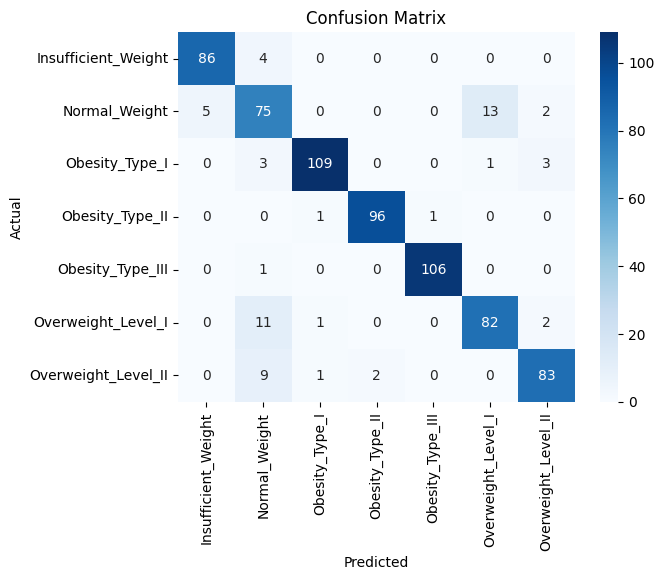

In [194]:
# Train the Chosen final model
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train_scaled2, y_train)

# Test the model on the test set
y_pred = rand_forest.predict(X_test_scaled2)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"\nTest set accuracy: {test_accuracy:.4f}")
print("Classification report:")
print(classification_report(y_test, y_pred))

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Insufficient_Weight','Normal_Weight', 'Obesity_Type_I','Obesity_Type_II', 
            'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II'],
              yticklabels=['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I','Obesity_Type_II', 
            'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()